In [1]:
from keras.preprocessing.text import Tokenizer
# Tokenizer : 토큰화
tok=Tokenizer()
text="Regret for wasted time is more wasted time"
tok.fit_on_texts([text])
# [text] : 단어 단위 토큰화
# text : 문자 단위 토큰화

Using TensorFlow backend.


In [2]:
tok.word_index

{'wasted': 1, 'time': 2, 'regret': 3, 'for': 4, 'is': 5, 'more': 6}

In [3]:
test="Regret for wasted time is more wasted hour"
print(tok.texts_to_sequences([test]))
#사전에 test에 저장된 단어가 있는지 확인
seq=tok.texts_to_sequences([test])[0]

[[3, 4, 1, 2, 5, 6, 1]]


In [4]:
from keras.preprocessing.sequence import pad_sequences
#샘플의 길이를 동일하게 해주는 함수
pad_sequences([[1,2,3],[2,3,4,5],[6,7]],maxlen=3, padding='post')
# maxlen 뒷부분부터 채워짐, padding 디폴트 pre 앞부분 빈곳 0 채워줌
# 워드 임베딩 : 문장 내의 단어들을 밀집벡터로 만드는 작업(Embedding)
# 원핫벡터(고차원,희소벡터,기억장소낭비 심하다)
# 밀집벡터(Dense벡터)저차원,실수값
# ex)원핫벡터:001000......0000(tiger)
# ex)밀집벡터:[0.1 - 1.5 1.9 2.4](tiger)
# ex) text=[[0,1,2,3],[3,4,1,5]]
# =>Embedding(6,2,4)
# => 0->[1.3,1.5], 1->[2.5, 4.1],...
# 6:단어개수, 2:벡터크기, 4:시퀀스길이

array([[1, 2, 3],
       [3, 4, 5],
       [6, 7, 0]])

In [5]:
# functional API
from keras.layers import Input, Dense, LSTM
from keras.models import Model

In [6]:
# 1. functional api 사용해 모델 만드는 방법
# 
inp=Input(shape=(10,)) # 10개 입력, 입력층
h1=Dense(32,activation='relu')(inp)
h2=Dense(16,activation='relu')(h1)
outp=Dense(1,activation='sigmoid')(h2)
# 뒤에 inp입력, 앞에 32 출력
Model(inputs=inp,outputs=outp)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xdata,ydata)

NameError: name 'model' is not defined

In [8]:
#rnn 구조를 함수형 api로 표현

In [9]:
inp=Input(shape=(50,1))
h1=LSTM(10)(inp)
h2=Dense(10,activation='relu')(h1)
outp=Dense(1,activation='sigmoid')(h2)
model=Model(inputs=inp,outputs=outp)

In [10]:
#MLP로 텍스트 분류
from keras.preprocessing.text import Tokenizer
import numpy as np

In [11]:
texts=['먹고 싶은 사과','먹고 싶은 바나나',
       '길고 노란 바나나 바나나',
       '저는 과일이 좋아요']

In [12]:
#토큰화
tok=Tokenizer()
tok.fit_on_texts(texts)
print(tok.word_index)#빈도수 내림차순

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [13]:
tok.texts_to_matrix(texts,mode='count')#DTM

array([[0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [14]:
tok.texts_to_matrix(texts,mode='tfidf')
#첫 문장에서 4인자값이 가장 큼 즉, 사과가 그 문장에서 영향력이 가장 높다

array([[0.        , 0.        , 0.84729786, 0.84729786, 1.09861229,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.84729786, 0.84729786, 0.84729786, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.43459998, 0.        , 0.        , 0.        ,
        1.09861229, 1.09861229, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.09861229, 1.09861229, 1.09861229]])

In [15]:
tok.texts_to_matrix(texts,mode='binary')#binary:있냐 없냐 유무 판단

array([[0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [16]:
tok.texts_to_matrix(texts,mode='freq')#freq 문장 단위 등장 비율

array([[0.        , 0.        , 0.33333333, 0.33333333, 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.25      , 0.25      , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.33333333, 0.33333333]])

In [17]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [18]:
newsData=fetch_20newsgroups(subset='train')#test, all(18000개)

In [19]:
print(newsData.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [20]:
# len(newsData.data)#11314
len(newsData.target)# 11314
print(newsData.target)#주제가20
print(newsData.target_names)

[7 4 4 ... 3 1 8]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [21]:
#타켓 10의 주제가 궁금하면
print(newsData.target[10])#주제가20
print(newsData.target_names[10])

8
rec.sport.hockey


In [22]:
df=pd.DataFrame(newsData.data,columns=['email'])

In [23]:
df['target']=pd.Series(newsData.target)

In [24]:
df

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
email     11314 non-null object
target    11314 non-null int32
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [26]:
df.isnull()

,email,target
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
11309,False,False
11310,False,False
11311,False,False
11312,False,False


In [27]:
df.isnull().values.any()

False

11314
20
10    600
15    599
8     598
9     597
11    595
13    594
7     594
14    593
5     593
12    591
2     591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: target, dtype: int64


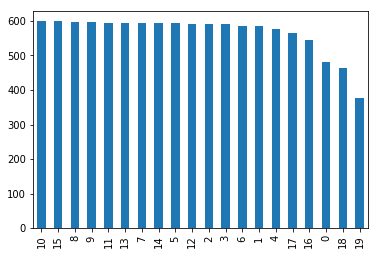

In [28]:
print(df['email'].nunique())#11314개 샘플
print(df['target'].nunique())#20가지 주제 
print(df['target'].value_counts())
df['target'].value_counts().plot(kind='bar')

In [29]:
df.groupby('target').size()

target
0     480
1     584
2     591
3     590
4     578
5     593
6     585
7     594
8     598
9     597
10    600
11    595
12    591
13    594
14    593
15    599
16    546
17    564
18    465
19    377
dtype: int64

In [30]:
newsDataTest=fetch_20newsgroups(subset='test',shuffle=True)

In [31]:
trainEmail=df['email']
trainLabel=df['target']

In [32]:
len(newsDataTest.data)

7532

In [33]:
testEmail=newsDataTest.data#테스트 데이터 본문
testLabel=newsDataTest.target

In [34]:
def preData(trainData,testData,mode):#preprocessing
    tok=Tokenizer(num_words=10000)
    #빈도수가 가장 높은 상위 10000
    tok.fit_on_texts(trainData)
    xTrain=tok.texts_to_matrix(trainData,mode=mode)
    xTest=tok.texts_to_matrix(testData,mode=mode)
    return xTrain,xTest,tok.index_word
xTrain,xTest,index_word=preData(trainEmail,testEmail,'binary')

In [35]:
texts=['먹고 싶은 사과','먹고 싶은 바나나',
       '길고 노란 바나나 바나나',
       '저는 과일이 좋아요']

In [36]:
xTrain.shape#11314,134152
xTest.shape#7532,10000
trainLabel.shape#11314,

(11314,)

In [37]:
yTrain=to_categorical(trainLabel,20)
yTest=to_categorical(testLabel,20)

In [38]:
index_word

{1: 'the',
 2: 'to',
 3: 'of',
 4: 'a',
 5: "'ax",
 6: 'and',
 7: 'in',
 8: 'i',
 9: 'is',
 10: 'that',
 11: 'it',
 12: 'for',
 13: 'you',
 14: 'from',
 15: 'edu',
 16: 'on',
 17: 'this',
 18: 'be',
 19: 'are',
 20: 'not',
 21: 'have',
 22: 'with',
 23: 'as',
 24: '1',
 25: 'or',
 26: 'was',
 27: 'if',
 28: 'but',
 29: 'subject',
 30: 'they',
 31: 'com',
 32: 'lines',
 33: 'at',
 34: 'organization',
 35: 'by',
 36: '2',
 37: 'an',
 38: 'my',
 39: 'can',
 40: 'x',
 41: '3',
 42: 'what',
 43: '0',
 44: 'all',
 45: 'will',
 46: 'm',
 47: 'there',
 48: 'would',
 49: 'one',
 50: 'do',
 51: "'",
 52: 'about',
 53: 're',
 54: 'we',
 55: 'writes',
 56: 'so',
 57: 'he',
 58: 'your',
 59: 'no',
 60: 'has',
 61: 'article',
 62: 'any',
 63: 'me',
 64: 'some',
 65: 'who',
 66: 'out',
 67: 'which',
 68: '4',
 69: 'q',
 70: 'more',
 71: 'like',
 72: 'people',
 73: "don't",
 74: 'when',
 75: '5',
 76: 'just',
 77: 'university',
 78: 'posting',
 79: 'their',
 80: 'were',
 81: 'up',
 82: 'r',
 83: 'p',


In [39]:
#MLP 기반 텍스트 분류 모델
from keras.layers import Dropout
from keras.models import Sequential

In [40]:
def fitEval(xTrain,yTrain,xTest,yTest):#fit & evaluate 수행 함수
    model=Sequential()
    model.add(Dense(256,input_shape=(10000,),activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    model.fit(xTrain,yTrain,batch_size=128,epochs=5, validation_split=0.1,verbose=1)
    #validation_split 트레인과 테스트 분할 비율
    #batch_size는 메모리를 고려. 너무 크면 메모리 과부하
    #너무 적게 주면 성능 저하
    score=model.evaluate(xTest,yTest,batch_size=128)
    return score[1]

In [41]:
score=fitEval(xTrain,yTrain,xTest,yTest)
# 모델 훈련 & 평가
# score : 모델 정확도


Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 4s 411us/step - loss: 2.3343 - accuracy: 0.3220 - val_loss: 1.0044 - val_accuracy: 0.8118
Epoch 2/5
10182/10182 [==============================] - 4s 383us/step - loss: 0.8763 - accuracy: 0.7570 - val_loss: 0.4705 - val_accuracy: 0.8860
Epoch 3/5
10182/10182 [==============================] - 4s 386us/step - loss: 0.4467 - accuracy: 0.8803 - val_loss: 0.3506 - val_accuracy: 0.9019
Epoch 4/5
10182/10182 [==============================] - 4s 387us/step - loss: 0.2652 - accuracy: 0.9343 - val_loss: 0.3111 - val_accuracy: 0.9134
Epoch 5/5
7532/7532 [==============================] - 1s 128us/step


In [42]:
score

0.8270047903060913

In [43]:
xTrain,xTest,_=preData(trainEmail,testEmail,'binary')
fitEval(xTrain,yTrain,xTest,yTest)
print("정확도 : ",score)

Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 4s 403us/step - loss: 2.3230 - accuracy: 0.3216 - val_loss: 0.9765 - val_accuracy: 0.8348
Epoch 2/5
10182/10182 [==============================] - 4s 382us/step - loss: 0.8844 - accuracy: 0.7571 - val_loss: 0.4599 - val_accuracy: 0.8878
Epoch 3/5
10182/10182 [==============================] - 4s 382us/step - loss: 0.4329 - accuracy: 0.8897 - val_loss: 0.3400 - val_accuracy: 0.9055
Epoch 4/5
10182/10182 [==============================] - 4s 382us/step - loss: 0.2627 - accuracy: 0.9357 - val_loss: 0.3142 - val_accuracy: 0.9019
Epoch 5/5
7532/7532 [==============================] - 1s 126us/step
정확도 :  0.8270047903060913


In [ ]:
"뉴욕타임즈, 워싱턴 포스트..."